<a href="https://colab.research.google.com/github/NiklasCODES/CodeIgniterWebapp/blob/master/a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

Regression attempts to fit a function model to training data. Let's create a data set from a function, here $f = 3x^3 - 2x$, and add some Gaussian noise with standard deviation `sigma`:

In [3]:
import numpy as np

def generate_data(X, f=lambda x: 3*x**3 - 2*x, sigma=0.1):
    y = f(X) + np.random.normal(scale=sigma, size=X.shape)
    return y

X = np.linspace(-1,1,9)
y = generate_data(X)

X_test = np.linspace(-1, 1, 41)
y_test = generate_data(X_test, sigma=0.0)

### Visualize data

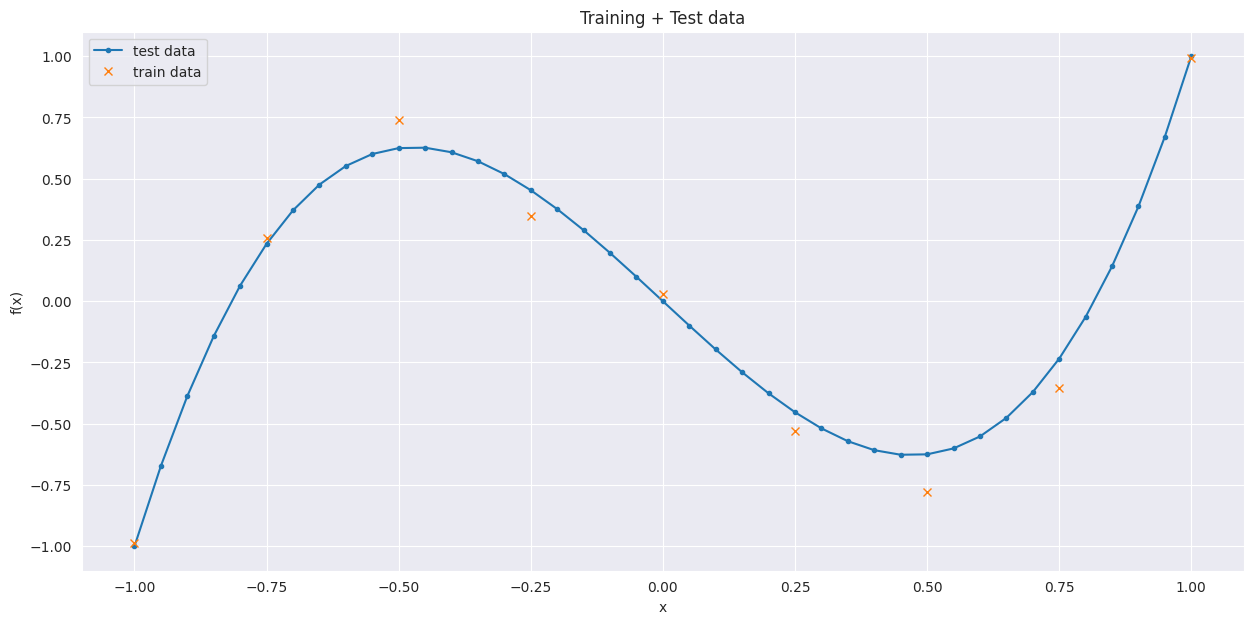

In [4]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

plt.figure(figsize=(15, 7))
plt.title("Training + Test data")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(X_test, y_test, ".-", label="test data")
plt.plot(X, y, 'x', label="train data")
plt.legend()
plt.show()

## Task 1: Polynomial function fitting

Augment the following code snippet to actually compute the nonlinear regression given the first $1..M$ training data points and considering a polynomial model of degree $P \in \{0..8\}$.  
What do you expect as optimal parameter values $w_0$ to $w_3$ for a polynomial model of degree $P=3$?

In [6]:
class Regression:
    def __init__(self, alpha=0.0):
        self.w = np.zeros(0)
        self.alpha = alpha

    def predict(self, X):  # apply prediction model to data X
        return np.dot(X, self.w)

    def fit(self, X, y):  # TODO: compute optimal weights for training data (X,y)
        self.w = np.zeros(X.shape[1])
        self.w[0] = 1
        self.w[1] = 1
        self.w[2] = 1

In [19]:
from matplotlib import pyplot as plt
from ipywidgets import interact

class Regression:
    def __init__(self, alpha=0.0):
        self.w = np.zeros(0)
        self.alpha = alpha

    def predict(self, X):  # apply prediction model to data X
        return np.dot(X, self.w)

    def fit(self, X, y):  # TODO: compute optimal weights for training data (X,y)
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

# @ interact makes the following function (update) interactive, with sliders for M and P
@interact(M=(1, len(X)), P=(0, 8))
def update(M=len(X), P=3):
    def design_matrix(X):  # compute polynomial features
        return np.power(np.transpose([X]), range(0, P+1))
    
    # train regression model
    reg = Regression()
    reg.fit(design_matrix(X[0:M]), y[0:M])  # fit the first M training points only
    print('w: ', reg.w)

    plt.figure(42, figsize=(15,7))
    plt.plot(X_test, y_test, '.-', label="test data")  # plot ground truth of test data
    plt.plot(X_test, reg.predict(design_matrix(X_test)), 'r-', label="prediction")  # plot model prediction on test data
    plt.scatter(X[0:M], y[0:M], marker='x', label="train data") # plot training data
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=9, description='M', max=9, min=1), IntSlider(value=3, description='P', m…

## Task 2

Explain, what is learned in the following situations:

1. $M=9$, $P=0$
2. $M=4$, $P=3$
3. $M=9$, $P=8$

## Task 3: Ridge Regression

To improve the smoothness of the learned function model, we can use Ridge regression, which adds a regularization term to our cost function:

${\cal L} = \frac{1}{M} \|\hat{\mathbf y} - \mathbf y\|^2 + \lambda \|\mathbf w\|^2$

Show and verify step by step that the minimization of this loss functions yields the learning rule of Ridge regression:

$\mathbf w^* = (\mathbf X^t \mathbf X + \lambda \mathbf 1)^{-1} \mathbf X^t \mathbf y$

_Hint_: See [_The Matrix Cookbook_ (Petersen and Pedersen, 2012)](http://www2.imm.dtu.dk/pubdb/edoc/imm3274.pdf), for derivatives (section 2.4), norms (section 10.3) and other identities of vectors and matrices.

Extend your implementation to perform Ridge regression.  
Introduce $\lambda$ as a new parameter `alpha` to your `update` function and determine a suitable value for the case $P=8, M=9$ from task 2.  
Explain what happens for very large and very small values of $\lambda$.

## Task 4: LASSO

Instead of using the L2 norm, i.e. the _squared_ Euclidean norm $\|\mathbf w\|_2^2 = \sum w_i^2$, one can also use the L1 norm, i.e. $\|\mathbf w\|_1 = \sum |w_i|$, as a regularization term.  
This results in LASSO regression (_least absolute shrinkage and selection operator_).

1. Replace your `Regression` instance with the [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso) regressor from [scikit-learn](https://scikit-learn.org):  
   ```python
   from sklearn.linear_model import Lasso
   ```  
   Compare the resulting weight vectors with those from Ridge regression. What do you observe?

2. Determine and sketch the derivatives of both norms w.r.t. $\mathbf w$.  
   What are the advantages and disadvantages of both regularization terms?